In [6]:
mutable struct Pendulum
    mass::Number
    len::Number
    θ::Number
    ω::Number
end

In [7]:
dt = 1
g = 9.82

9.82

In [44]:
function single_pendulum_iteration(pen::Pendulum)

    pen.ω += -dt * pen.len * pen.θ/g
    pen.θ += pen.ω * dt
    
    return pen.len * sin(pen.θ), -pen.len * cos(pen.θ)
end

single_pendulum_iteration (generic function with 1 method)

In [155]:
using Random
using Plots

pen = Pendulum(1, 1, -1, 0)

x = [0, pen.len * sin(pen.θ)]
y = [0, -cos(pen.θ)]

anim = @animate for i in 1:50
    x[2], y[2] = single_pendulum_iteration(pen)    
    plot(x, y, xlims=(-1,1),ylims=(-1.2,0.2); marker=(:circle,1))
    # scatter(x, y)
end

Animation("/var/folders/z0/_9x091jj0vs_797b_p_b7vcc0000gq/T/jl_KTIxrZ", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/tmp.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/tmp.gif")
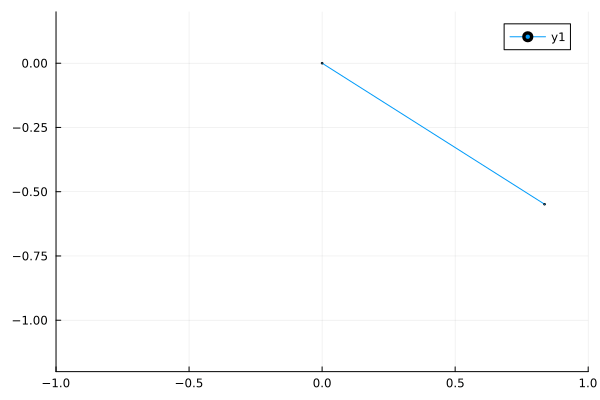

In [47]:
gif(anim, fps=10)

In [113]:
function RK4(h::Float64, state::Vector, pen1::Pendulum, pen2::Pendulum)
    k1 = h * derivatives(state, pen1, pen2)
    k2 = h * derivatives(state + k1/2, pen1, pen2)
    k3 = h * derivatives(state + k2/2, pen1, pen2)
    k4 = h * derivatives(state + k3, pen1, pen2)
    
    return state + (k1 + 2k2 + 2k3 + k4) / 6
end

function derivatives(state, pen1::Pendulum, pen2::Pendulum)
    θ₁, ω₁, θ₂, ω₂ = state

    dθ₁, dθ₂ = ω₁,ω₂
    dω₁, dω₂ = α₁(pen1, pen2)
    # dω₂ = α₂(pen1, pen2)

    @show dω₁
    
    return [dθ₁, dω₁, dθ₂, dω₂]
end

derivatives (generic function with 1 method)

In [109]:
function α₁(pen1::Pendulum, pen2::Pendulum)
    Δθ = pen1.θ - pen2.θ
    sin_Δθ = sin(Δθ)
    cos_Δθ = cos(Δθ)
    
    dω₁ = (-g * (2*pen1.mass + pen2.mass) * sin(pen1.θ) -
                pen2.mass * g * sin(pen1.θ - 2*pen2.θ) -
                2 * sin_Δθ * pen2.mass * (pen2.ω^2 * pen2.len + pen1.ω^2 * pen1.len * cos_Δθ)/
        pen1.len * (2*pen1.mass + pen2.mass - pen2.mass * cos(2*Δθ)))
    
    dω₂ = ((2 * sin_Δθ * (pen1.ω^2 * pen1.len * (pen1.mass + pen2.mass) +
                g * (pen1.mass + pen2.mass) * cos(pen1.θ) +
                pen2.ω^2 * pen2.len * pen2.mass * cos_Δθ))/
        pen2.len * (2*pen1.mass + pen2.mass - pen2.mass * cos(2*Δθ)))

    return [dω₁,dω₂]
    
end

α₁ (generic function with 2 methods)

In [102]:
function iterate_double_pendulum(dt::Float64, pen1::Pendulum, pen2::Pendulum)
    state = [pen1.θ, pen1.ω, pen2.θ, pen2.ω]
    pen1.θ, pen1.ω, pen2.θ, pen2.ω = RK4(dt, state, pen1, pen2)
end


iterate_double_pendulum (generic function with 1 method)

In [103]:
function calculate_positions(pen1, pen2)
    x1 = pen1.len * sin(pen1.θ)
    y1 = -pen1.len * cos(pen1.θ)
    x2 = x1 + pen2.len * sin(pen2.θ)
    y2 = y1 - pen2.len * cos(pen2.θ)
    return [0, x1, x2], [0, y1, y2]
end

calculate_positions (generic function with 1 method)

In [ ]:

pen1 = Pendulum(0.01, 5, 2, 0) 
pen2 = Pendulum(0.01, 5, 1, 1)
dt = 0.01

anim = @animate for i in 1:500 
    iterate_double_pendulum(dt, pen1, pen2)
    x, y = calculate_positions(pen1, pen2)
    
    plot(x, y, 
         xlims=(-10,10), ylims=(-10,10), 
         aspect_ratio=:equal,
         line=(:black, 2),
         marker=(:circle, 6),
         title="Double Pendulum Simulation",
         xlabel="X position", ylabel="Y position")
end

gif(anim, "double_pendulum.gif", fps = 30) 

dω₁ = -0.26845393963140535
dω₁ = -0.26845393963140535
dω₁ = -0.26845393963140535
dω₁ = -0.26845393963140535
dω₁ = -0.266483615760037
dω₁ = -0.266483615760037
dω₁ = -0.266483615760037
dω₁ = -0.266483615760037
dω₁ = -0.26451468876927897
dω₁ = -0.26451468876927897
dω₁ = -0.26451468876927897
dω₁ = -0.26451468876927897
dω₁ = -0.26254795017240556
dω₁ = -0.26254795017240556
dω₁ = -0.26254795017240556
dω₁ = -0.26254795017240556
dω₁ = -0.2605841965243287
dω₁ = -0.2605841965243287
dω₁ = -0.2605841965243287
dω₁ = -0.2605841965243287
dω₁ = -0.25862422904913973
dω₁ = -0.25862422904913973
dω₁ = -0.25862422904913973
dω₁ = -0.25862422904913973
dω₁ = -0.25666885326129035
dω₁ = -0.25666885326129035
dω₁ = -0.25666885326129035
dω₁ = -0.25666885326129035
dω₁ = -0.2547188785806699
dω₁ = -0.2547188785806699
dω₁ = -0.2547188785806699
dω₁ = -0.2547188785806699
dω₁ = -0.25277511794184443
dω₁ = -0.25277511794184443
dω₁ = -0.25277511794184443
dω₁ = -0.25277511794184443
dω₁ = -0.25083838739772707
dω₁ = -0.25083838

In [12]:
function double_pendulum_iteration(pen1::Pendulum, pen2::Pendulum)

    Δθ = pen1.θ - pen2.θ
    α = (pen1.mass +pen2.mass)*(sin(Δθ))^2
    M = pen1.mass + pen2.mass
    
    pen1.ω += ((-1)*sin(Δθ)*(pen2.mass*pen1.len*(pen1.ω^2)*cos(Δθ)+pen2.mass*pen2.len*(pen2.ω)^2))
        -g*(M*sin(pen1.θ)-pen2.mass*sin(pen2.θ)*cos(Δθ))/(pen1.len*α)

    pen2.ω += (
    (sin(Δθ)*(M*pen1.len*(pen1.ω)^2+pen2.mass*pen2.len*(pen2.ω)^2*cos(Δθ))
        +g*(M*sin(pen1.θ)*cos(Δθ)-M*sin(pen2.θ))
        )/(pen2.len*α)
    )
    
    pen1.θ += pen1.ω * dt
    pen2.θ += pen2.ω * dt
    
    x_1, y_1 = (pen1.len * sin(pen1.θ), -cos(pen1.θ)*pen1.len)
    x_2, y_2 = (pen1.len * sin(pen1.θ) + pen2.len * sin(pen2.θ), -cos(pen1.θ)*pen1.len-pen2.len*cos(pen2.θ))
    return return [x_1, y_1, x_2, y_2]   
end

double_pendulum_iteration (generic function with 1 method)

In [71]:
using Random
using Plots

pen1 = Pendulum(0.01, 5, 2, 0)
pen2 = Pendulum(0.01, 5, 1, 1)
dt = 0.1

x1, y1 = (pen1.len * sin(pen1.θ), -cos(pen1.θ)*pen1.len)
x2, y2 = (pen1.len * sin(pen1.θ) + pen2.len * sin(pen2.θ), -cos(pen1.θ)*pen1.len-pen2.len*cos(pen2.θ))

x = [0, x1, x2]
y = [0, y1, y2]

anim = @animate for i in 1:50
    x[2], y[2], x[3], y[3] = iterate_double_pendulum(dt, pen1, pen2)
    plot(x, y, xlims=(-10,10),ylims=(-10,10); marker=(:circle,1))
    # scatter(x, y)
end

state = [2, 0, 1, 1]
state = [2, 0, 1, 1]
(Δθ, α, M) = (1, 0.014161468365471424, 0.02)
(dω₂, dω₁) = (-0.6502437326100221, -1.9336783957829335)
state = [2.0, -0.09668391978914669, 1.05, 0.9674878133694989]
(Δθ, α, M) = (1, 0.014161468365471424, 0.02)
(dω₂, dω₁) = (-0.6502437326100221, -1.9336783957829335)
state = [1.9951658040105427, -0.09668391978914669, 1.048374390668475, 0.9674878133694989]
(Δθ, α, M) = (1, 0.014161468365471424, 0.02)
(dω₂, dω₁) = (-0.6502437326100221, -1.9336783957829335)
state = [1.9903316080210853, -0.19336783957829337, 1.0967487813369499, 0.9349756267389978]
(Δθ, α, M) = (1, 0.014161468365471424, 0.02)
(dω₂, dω₁) = (-0.6502437326100221, -1.9336783957829335)
(k1, k2, k3, k4) = ([0.0, -0.19336783957829337, 0.1, -0.06502437326100222], [-0.00966839197891467, -0.19336783957829337, 0.09674878133694989, -0.06502437326100222], [-0.00966839197891467, -0.19336783957829337, 0.09674878133694989, -0.06502437326100222], [-0.01933678395782934, -0.19336783957829337, 0.0934975626

LoadError: DomainError with Inf:
sin(x) is only defined for finite x.

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/tmp.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/tmp.gif")
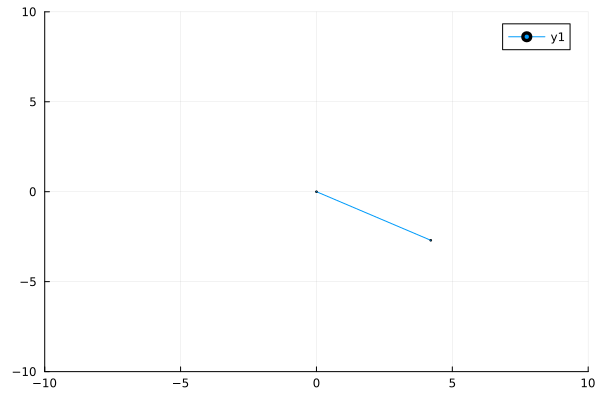

In [72]:
gif(anim, fps=100)